In [13]:
from eagles.Stats import (
    assumptions
    , power as p
    , compare_proportions as cp
    , chi_squared as x2
    , plot_utils as pu
)
from eagles.Stats.parametric import compare_means as cm, regress as r
import pandas as pd
import numpy as np
import random


from eagles.data_sets import data_loader
iris = data_loader.load_iris()
titanic = pd.read_csv("C:\\Users\\JonLa\\Desktop\\data.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

## Sample Size Calculator

### Comparing Means

In [ ]:
p.sample_size_comparing_two_means(group1_mean=50
                                        ,group2_mean=60
                                        ,sigma=100
                                        ,alpha= 0.05
                                        ,power= 0.8
                                        ,tails='two'
                                       )

In [2]:
# Sample size for means
res = p.sample_size_comparing_two_means(group1_mean=50
                                        ,group2_mean=60
                                        ,sigma=100
                                        ,alpha= 0.05
                                        ,power= 0.8
                                        ,tails='two'
                                       )

print("Total number samples needed per group: " + str(res))
print("Total number samples needed per group: " + str(res*2))


Total number samples needed per group: 16
Total number samples needed per group: 32


### Comparing Proportions

In [3]:
# Sample size for proportions
res = p.sample_size_comparing_two_proportions(p1=0.5
                                              , p2=0.6
                                              , alpha=0.05
                                              , power=0.8
                                              , tails='two'
                                             )

print("Total number samples needed per group: " + str(res))
print("Total number samples needed: " + str(res*2))


Total number samples needed per group: 385
Total number samples needed: 770


## Tests of Normality

In [4]:
res = assumptions.test_normality(x=np.random.randn(100), disp=True)

,Normality Test,Test Statistic,p Value
0,Shapiro-Wilk Test,0.9769,0.0759
1,D’Agostino’s K^2 Test,2.2760,0.3205
2,Kolmogorov–Smirnov Test,0.0699,0.6866


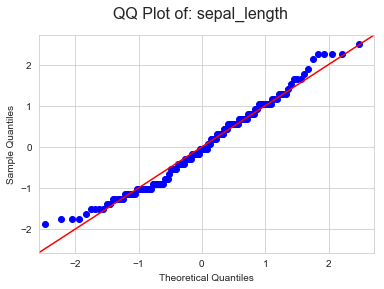

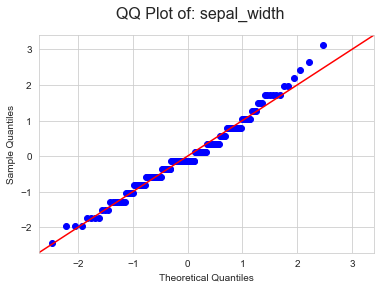

In [5]:
pu.qq_plot_for_normality(data=iris, cols=['sepal_length', 'sepal_width'])

## T Test

### One Sample T Test

In [ ]:
res = cm.one_sample_t_test(data=, pop_mn=, disp=True)

In [6]:
# Define testing data
np.random.seed(123)
x = list(np.random.normal(loc=7, size=30))
y = list(np.random.normal(loc=4, size=30))

df = pd.DataFrame({'group':['group 1' for i in range(30)] +
                           ['group 2' for i in range(30)]
                   ,'measurement':x+y})


### Independent Samples

,Normality Test,Test Statistic,p Value
0,Shapiro-Wilk Test,0.9848,0.6601
1,D’Agostino’s K^2 Test,1.4401,0.4867
2,Kolmogorov–Smirnov Test,0.9704,0.0000


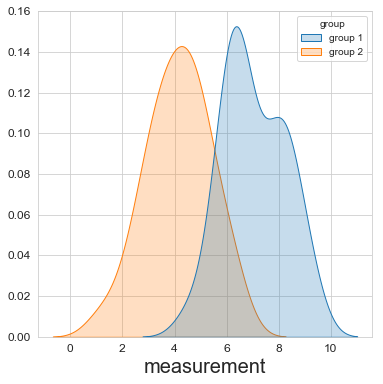

levene test statistic was: 0.0026 p value of: 0.9592


,count,mean,median,std,var,min,max
group,,,,,,,
group 1,30,7.044700,6.715500,1.187200,1.409400,4.573300,9.205900
group 2,30,4.141500,4.156700,1.232700,1.519400,1.201400,6.392400


Statistic,Value
t stat,9.291600
dof,58
p value,0.000000
95% CI,"[2.2778, 3.5287]"
effect size,2.399100
power,1.000000


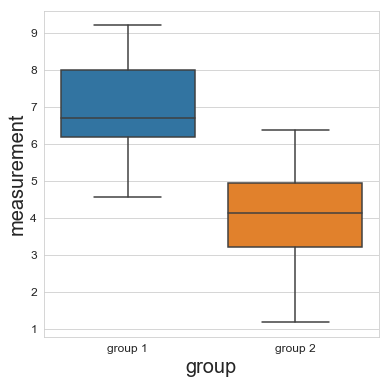

In [7]:
res, agg_stats = cm.t_test(data=df
               ,iv='group'
               ,dv='measurement'
               ,paired=False
               ,alpha=0.05
               ,tails="two"
               ,welch=False
               ,hedges_g=False
               ,disp=True)

### Paired Samples

,Normality Test,Test Statistic,p Value
0,Shapiro-Wilk Test,0.9848,0.6601
1,D’Agostino’s K^2 Test,1.4401,0.4867
2,Kolmogorov–Smirnov Test,0.9704,0.0000


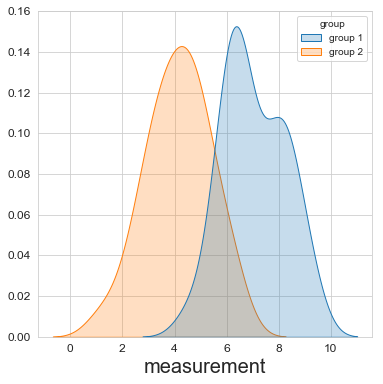

levene test statistic was: 0.0026 p value of: 0.9592


,count,mean,median,std,var,min,max
group,,,,,,,
group 1,30,7.044700,6.715500,1.187200,1.409400,4.573300,9.205900
group 2,30,4.141500,4.156700,1.232700,1.519400,1.201400,6.392400


Statistic,Value
t stat,8.732300
dof,29
p value,0.000000
95% CI,"[2.3809, inf]"
effect size,2.254700
power,1.000000


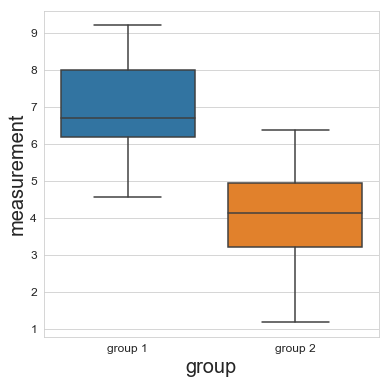

In [8]:
res, agg_stats = cm.t_test(data=df
               ,iv='group'
               ,dv='measurement'
               ,paired=True
               ,alpha=0.05
               ,tails="one_greater"
               ,welch=False
               ,hedges_g=False
               ,disp=True)


## ANOVA

### One-Way

,Normality Test,Test Statistic,p Value
0,Shapiro-Wilk Test,0.9026,0.0
1,D’Agostino’s K^2 Test,136.7770,0.0
2,Kolmogorov–Smirnov Test,0.5398,0.0


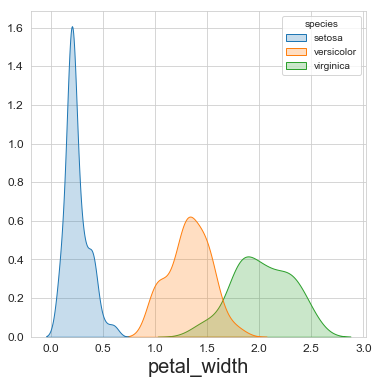

,count,mean,median,std,var,min,max
species,,,,,,,
setosa,50,0.244000,0.200000,0.107200,0.011500,0.100000,0.600000
versicolor,50,1.326000,1.300000,0.197800,0.039100,1.000000,1.800000
virginica,50,2.026000,2.000000,0.274700,0.075400,1.400000,2.500000


,df,sum_sq,mean_sq,F,PR(>F),eta squared
species,2.000000,80.604133,40.302067,959.324406,0.000000,0.928836
Redidual,147.000000,6.175600,0.042011,nan,nan,nan


,group1,group2,meandiff,p-adj,lower,upper,reject
0,setosa,versicolor,1.082000,0.001000,0.984900,1.179100,True
1,setosa,virginica,1.782000,0.001000,1.684900,1.879100,True
2,versicolor,virginica,0.700000,0.001000,0.602900,0.797100,True


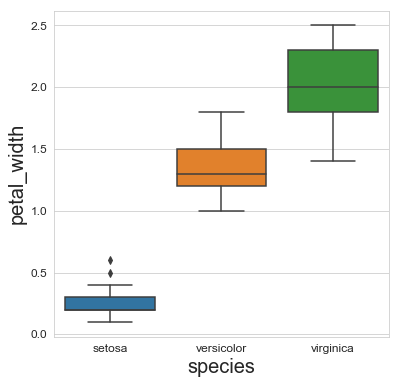

In [9]:
res, agg_stats, multi_comps = cm.anova(data=iris
               , iv='species'
               , dv='petal_width'
               , obs_id=None
               , anova_type="one_way"
               , disp=True)

### Two-Way

In [10]:
x = list(np.random.normal(loc=50, size=30))
y = list(np.random.normal(loc=55, size=30))
df = pd.DataFrame({'iv_1':['a' for i in range(20)] + ['b' for i in range(20)] + ['c' for i in range(20)]
                   ,'iv_2':['dog' for i in range(15)] + 
                           ['cat' for i in range(15)] + 
                           ['dog' for i in range(15)] + 
                           ['cat' for i in range(15)] 
                   ,'dv':x+y})


,Normality Test,Test Statistic,p Value
0,Shapiro-Wilk Test,0.9233,0.001
1,D’Agostino’s K^2 Test,43.8915,0.000
2,Kolmogorov–Smirnov Test,1.0000,0.000


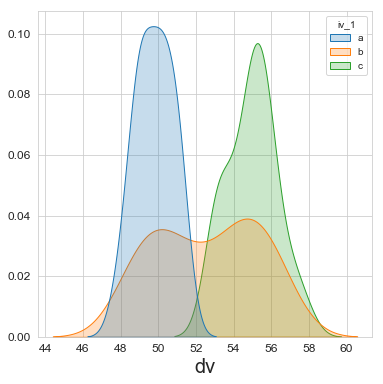

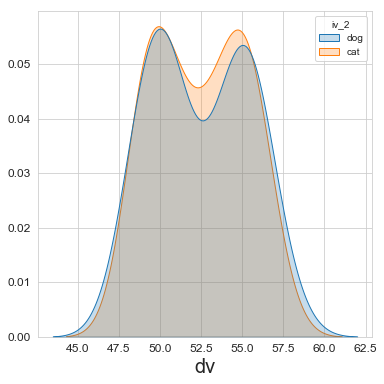

,df,sum_sq,mean_sq,F,PR(>F),eta squared
iv_1,2.000000,268.496552,134.248276,102.998937,0.000000,0.592252
iv_2,1.000000,57.352242,57.352242,44.002204,0.000000,0.126508
iv_1 : iv_2,2.000000,57.116534,28.558267,21.910681,0.000000,0.125988
Residual,54.000000,70.383317,1.303395,nan,nan,nan


,group1,group2,meandiff,p-adj,lower,upper,reject
0,a cat,a dog,0.228500,0.900000,-1.513300,1.970300,False
1,a cat,b cat,0.580700,0.900000,-1.266800,2.428100,False
2,a cat,b dog,5.335600,0.001000,3.488200,7.183100,True
3,a cat,c cat,5.205000,0.001000,3.463200,6.946800,True
4,a cat,c dog,5.776700,0.001000,3.643400,7.909900,True
5,a dog,b cat,0.352200,0.900000,-1.024800,1.729200,False
6,a dog,b dog,5.107200,0.001000,3.730200,6.484200,True
7,a dog,c cat,4.976600,0.001000,3.744900,6.208200,True
8,a dog,c dog,5.548200,0.001000,3.806400,7.290000,True
9,b cat,b dog,4.755000,0.001000,3.246500,6.263400,True


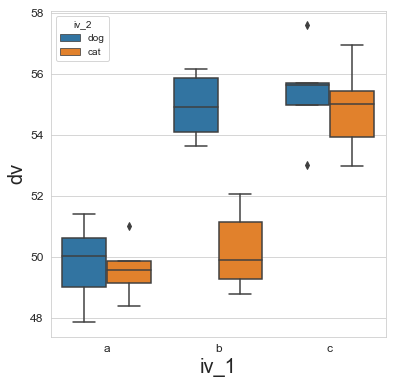

In [11]:
res, agg_stats, multi_comp = cm.anova(data=df
               , iv=['iv_1', 'iv_2']
               , dv='dv'
               , obs_id=None
               , anova_type="two_way"
               , disp=True)

### Repeated Measures

**Data set up. Note the id var is repeated to align with repeated measure points**

In [12]:
x = list(np.random.normal(loc=7, size=60))
y = list(np.random.normal(loc=4, size=60))
z = list(np.random.normal(loc=4.1, size=60))

df = pd.DataFrame({'id':[i for i in range(1,61)] + [i for i in range(1,61)] + [i for i in range(1,61)]
                    , 'iv':list(np.repeat('measure_1', 60)) + 
                           list(np.repeat('measure_2', 60)) + 
                           list(np.repeat('measure_3', 60))
                    , 'dv':x + y + z })


,Normality Test,Test Statistic,p Value
0,Shapiro-Wilk Test,0.9599,0.0001
1,D’Agostino’s K^2 Test,18.6141,0.0001
2,Kolmogorov–Smirnov Test,0.9696,0.0000


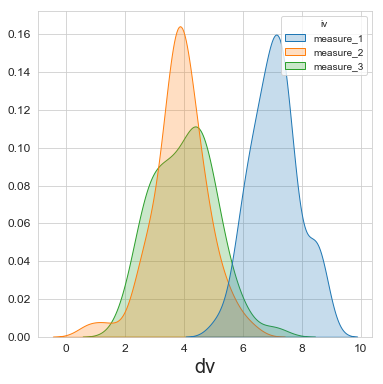

,count,mean,median,std,var,min,max
iv,,,,,,,
measure_1,60,7.076300,7.125500,0.812900,0.660800,5.123100,8.806000
measure_2,60,3.849800,3.839800,0.926900,0.859100,0.768900,6.200700
measure_3,60,3.995600,4.056600,1.054500,1.111900,1.947500,7.058600


,F Value,Num DF,Den DF,Pr > F
iv,238.636110,2.000000,118.000000,0.000000


,group1,group2,meandiff,p-adj,lower,upper,reject
0,measure_1,measure_2,-3.226500,0.001000,-3.630700,-2.822300,True
1,measure_1,measure_3,-3.080700,0.001000,-3.484900,-2.676500,True
2,measure_2,measure_3,0.145800,0.656900,-0.258400,0.550000,False


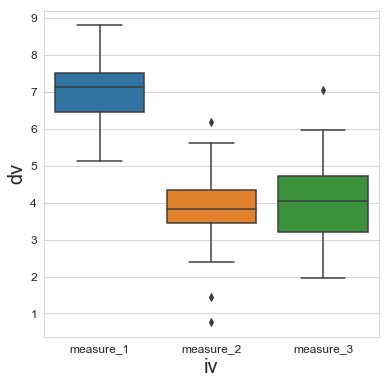

In [13]:
res, agg_stats, multi_comp = cm.anova(data=df
               , iv=['iv']
               , dv='dv'
               , obs_id='id'
               , anova_type="rm"
               , disp=True)

## Linear Regression

In [14]:
from eagles.data_sets import data_loader
from eagles.Stats import regress as r

iris = data_loader.load_iris()


Dep. Variable:,sepal_length,R-squared:,0.807
Model:,OLS,Adj. R-squared:,0.803
Method:,Least Squares,F-statistic:,203.8
Date:,"Wed, 02 Dec 2020",Prob (F-statistic):,5.57e-52
Time:,09:37:50,Log-Likelihood:,-60.565
No. Observations:,150,AIC:,129.1
Df Residuals:,146,BIC:,141.2
Df Model:,3,,
Covariance Type:,nonrobust,,


,,,,
0,Omnibus:,1.167,Durbin-Watson:,1.838
1,Prob(Omnibus):,0.558,Jarque-Bera (JB):,1.268
2,Skew:,0.177,Prob(JB):,0.530
3,Kurtosis:,2.723,Cond. No.,64.000


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.573500,0.112000,40.736000,0.000000,4.352000,4.795000
petal_length,0.440100,0.066000,6.707000,0.000000,0.310000,0.570000
petal_width,-1.225300,0.219000,-5.604000,0.000000,-1.657000,-0.793000
petal_length:petal_width,0.187200,0.034000,5.577000,0.000000,0.121000,0.254000


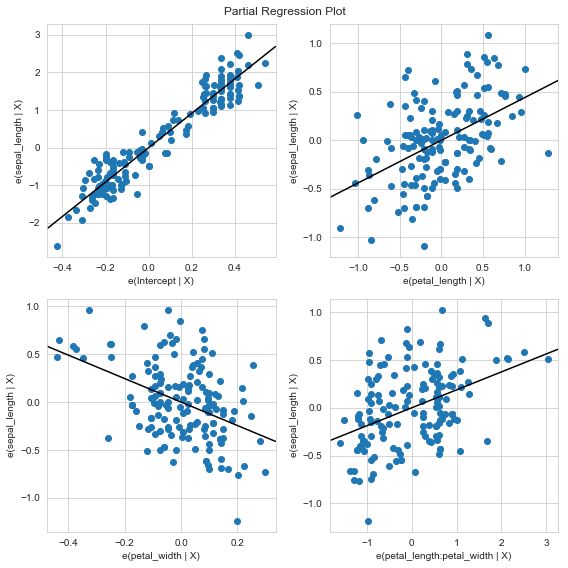

In [15]:
formula = 'sepal_length ~ petal_length + petal_width + petal_length:petal_width'
res = r.regression(formula=formula, data=iris, regress_type='ols', disp=True)

## Logistic Regression

In [16]:
# create a dummy outcome var
iris['class_1'] = list(map(lambda x: 1 if x == 'setosa' else 0,iris['species']))

formula = 'class_1 ~ petal_length + petal_width + petal_length:petal_width'
res = r.regression(formula=formula, data=iris, regress_type='logistic', disp=True)

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


Dep. Variable:,class_1,No. Observations:,150
Model:,Logit,Df Residuals:,146
Method:,MLE,Df Model:,3
Date:,"Wed, 02 Dec 2020",Pseudo R-squ.:,1.000
Time:,09:37:51,Log-Likelihood:,-0.00067799
converged:,True,LL-Null:,-95.477
Covariance Type:,nonrobust,LLR p-value:,3.800e-41


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,10.880300,1271.740000,0.009000,0.993000,-2481.683000,2503.444000
petal_length,5.526300,803.947000,0.007000,0.995000,-1570.180000,1581.233000
petal_width,-0.907100,1393.329000,-0.001000,0.999000,-2731.782000,2729.967000
petal_length:petal_width,-11.286800,798.108000,-0.014000,0.989000,-1575.550000,1552.976000


## Z Test Independent Proportions

In [17]:
res, agg_stats = cp.z_proportions_test(data=titanic
                            ,group='Sex'
                            ,outcome='Survived'
                            ,alpha=0.05
                            ,tails= "two"
                            ,disp=True
                           )



,Number of Observations,Percent Positive
male,314.000000,74.200000
female,577.000000,18.890000
total,891.000000,38.380000


,Statistic,Value
0,z stat,-16.218834
1,p value,0.000000
2,effect size,-0.543351
3,power,1.000000


## Chi2 Goodness of Fit

In [18]:
res, observed = x2.chi_2_goodness_fit(data=titanic
                                      ,category='Sex'
                                      ,alpha= 0.05
                                      ,disp=True
                                    )

,Sex
male,577
female,314


,Statistic,Value
0,chi2 stat,77.630752
1,dof,1.000000
2,p value,0.000000
3,effect size,0.295174
4,power,1.000000


## Chi2 Test of Independence

In [19]:
res, contingency = x2.chi_2_test_independence(data=titanic
                                             ,category_cols=['Sex', 'Survived']
                                             ,alpha=0.05
                                             ,effect_size_type="phi"
                                             ,yates=False
                                             ,disp=True
                                            )

Survived,0,1
Sex,,
female,81,233
male,468,109


,Statistic,Value
0,chi2 stat,263.050574
1,dof,1.000000
2,p value,0.000000
3,effect size,0.543351
4,power,1.000000
